# <font color=darkred><center>CLAREYAMAR <br>
### <font color=gold><center>Clara Lelis, Yasmin Shimizu, Gabriel Martins<br>
 <font color=darkred><center>*Inluminans Ignotus*☀️🌊
 
<font color=black><center>Divisão responsável pela segurança das águas territoriais e regiões portuárias do reino de Lumi, iluminando a escuridão dos mares e as profundezas do oceano.
    
 <font color=darkred><center> Quests 3
<font color=black><center> Após realizar as missões dos murais da Taverna do Sol e da Praça da Fonte e deixar seus relatórios nas mãos da Dra. Diana Didatolov, a Divisão Clareyamar ganhou muito mais reconhecimento e prestígio no reino. Com as missões anteriores concluídas, a Diretora da Biblioteca Real revelou ao grupo mais um mural que contém quests de nível mais elevado , solicitando ajuda a eles. A fim de continuar ajudando o povo e conquistar a Legião da Alvorada, o grupo aceitou e se propôs, novamente, a resolver problemas de diversos cidadãos de Lumi. Além disso, há relatos de que as águas locais estão contaminadas, e sábios marinheiros afirmaram avistar um terrível dragão do mar na região. Conhecendo esses rumores, como divisão responsável pelos recursos hídricos, o grupo decidiu se preparar para estudar o que está acontecendo no Reino de Lumi.     
    
##### <font color=darkred><center> Missão 1: As hipóteses reais
<div class="alert alert-warning">
<center> "Vossa Iluminação levantou a hipótese abaixo durante sua última reunião com a cúpula de Ciência, Tecnologia e Encantamentos do reinado. Sua tarefa é respondê-la. Para esta quest, utilize o dataset que pretende usar no seu projeto de conclusão do semestre desta disciplina e escolha o algoritmo de aprendizado de máquina que preferir.
    
<center> - Para o conjunto de dados escolhido, o algoritmo de árvore de decisão induz um
modelo com melhor performance do que o induzido pelo algoritmo de k -NN."
</div>
    
# <font color=darkred><center> As galhas do meu vizinho
<font color=black><center> O maravilhoso rei Milu de lumi possui uma bela casinha no topo de uma montanha, nas férias do final do semestre ele resolveu passar três semanas por lá, mas havia um problema, seu vizinho Imul Jamiel não podou as árvores do seu quintal e quando o rei chegou a sua cazinha estava sendo invadida pelas galhas do vizinho. Milu pediu para o senhor da casa ao lado para resolver o problema, porém Imul não tinha tempo! Ele estava em uma missão agoniante, desvendar a hípotese de que árvores de decisão são melhores que modelos K-NN quando feitas as otimizações de hiperparâmetros, infelizmente como Imul é um senhor muito velho ele faz tudo isso a mão, o que iria demandar um tempo muito absurdo, sendo que o senhor não conseguiria podar suas plantas e estragaria as férias do rei. A divisão Clareyamar se sentiu na obrigação de ajudar o  seu rei e o pobre ancião Jamiel, realizando a ardua tarefa de comparar os modelos, para que assim as galhas do vizinho não interfiram nas férias de Milu Iluminarius.

## <font color=chocolate> Introdução
    
Neste trabalho, serão realizados testes com diferentes conjuntos de hiperparâmetros para os modelos de regressão por k-nn e árvore de decisão para previsão de dureza da água com base no dataset *Water Quality* da plataforma `Kaggle`. Além disso, tais modelos foram treinado com todos os atributos mas também com uma seleção dos três melhores atributos para o modelo de regressão linear.

## <font color=chocolate> Bibliotecas Utilizadas

In [1]:
import os
import pandas as pd
from sklearn import tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from optuna import create_study
import matplotlib.pyplot as plt
import numpy as np

## <font color=chocolate>Métricas e Dataset

<font color=black> Primeiramente, para fazer a comparação entre estes modelos devemos definir quais métricas serão usadas para tal, neste caso utilizaremos a raiz do erro quadrático médio definido na função `calcula_RMSE`, e uma regressão linear simples definida na função `regressao_linear_simples`.

In [2]:
def calcula_RMSE(y_verdadeiro, y_previsto):

    RMSE = mean_squared_error(y_verdadeiro, y_previsto, squared=False)

    return RMSE

def regressao_linear_simples(x, y):
    media_x = np.mean(x)
    media_y = np.mean(y)

    beta_1 = sum((x - media_x) * (y - media_y)) / sum((x - media_x) ** 2)
    beta_0 = media_y - beta_1 * media_x

    return beta_0, beta_1

<font color=black> Agora precisamos carregar o datasset a ser utilizado, e para facilitar os calculos realizados iremos também eliminar os atributos não numéricos. O datasset a ser utilizado é o *Water Potability*, nele a coluna "Potability" contém dados binários, sendo assim, ela foi retirada dos atributos. 

In [3]:
local=os.getcwd()

df = pd.read_csv(local+'\\water_potability.csv')
df = df.dropna()
df.pop("Potability")

df.head(1)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771


<font color=black> Para treinar o modelo e analisar sua eficiência é feito um split de treino e teste para que as previsões observadas sejam condizentes com a realidade do datasset e para que obtenhamos previsões não enviesadas. Depois disso, separamos os atributos dos seus respectivos targets para realizar o treinamento dos modelos.

In [4]:
TAMANHO_TESTE = 0.1
SEMENTE_ALEATORIA = 281024

indices = df.index
indices_treino, indices_teste = train_test_split(indices, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

df_treino = df.loc[indices_treino]
df_teste = df.loc[indices_teste]

atr_treino = df_treino[["ph","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
target_treino = df_treino["Hardness"]

atr_teste = df_teste[["ph","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]]
target_teste = df_teste["Hardness"]

<font color=black> Para a previsão da dureza água, foram treinados quatro modelos: k-nn e árvore de decisão com todos os atibutos e com seleção de atributos. Assim, selecionamos os três melhores atributos com base no modelo de regressão linear simples, para não enviesar o treinamento dos modelos que se deseja estudar.

In [5]:
NUM_ATRIBUTOS_DESEJADOS = 3

modelo = LinearRegression()

seletor = RFE(modelo, n_features_to_select=NUM_ATRIBUTOS_DESEJADOS)
seletor.fit(atr_treino, target_treino)

X_treino_modificado = seletor.transform(atr_treino)
X_teste_modificado = seletor.transform(atr_teste)

col_selec=seletor.support_
atr= ["ph","Solids","Chloramines","Sulfate","Conductivity","Organic_carbon","Trihalomethanes","Turbidity"]

atr_selecionados=[]
for i,j in enumerate(col_selec):
    if col_selec[i]==True:
        atr_selecionados.append(atr[i])
    
selecao=atr_selecionados
atr_treino_sel=atr_treino[selecao]
atr_treino_sel.head(1)

,ph,Chloramines,Turbidity
1902,6.405392,8.450272,4.531921


Desse modo, os melhores atributos selecionados a serem utilizados nas previsões foram o pH , a quantidade de cloroaminas e a turbidez das amostras de água.

Além disso, definimos uma `função_objetivo` que treina o modelo e calcula seu RMSE.

In [6]:
def funcao_objetivo(trial, X, y, num_folds,funcao_model):
    """Recebe um número de tentativas (trial), os atributos e targets de teste (X e y), o número de folds da validação cruzada e o modelo que se deseja treinar.
    Retorna, como métrica calculada, o RMSE do modelo."""
    modelo = funcao_model(trial)

    metricas = cross_val_score(
        modelo,
        X,
        y,
        scoring="neg_root_mean_squared_error",
        cv=num_folds,)
    
    return -metricas.mean()

## <font color=chocolate> Modelo K-NN

Primeiramente, para treinamento do modelo k-nn, criamos uma função para instanciar o modelo, retornando diferentes combinações dos hiperparâmetros de número de vizinhos e peso dos vizinho na previsão para o modelo k-nn.

In [7]:
def cria_instancia_modelo_knn(trial):
    """Recebe um trial para sortear diferentes combinações de hiperparâmetros para o modelo k-nn."""
    u='uniform'
    d='distance'

    parametros = {
        "n_neighbors": trial.suggest_int("n_neighbors",2, 30, log=True),
        
        "weights":trial.suggest_categorical("weights",('uniform','distance'))
    }

    model_knn =KNeighborsRegressor(**parametros)

    return model_knn

Definiremos também um objeto de estudo para armazenar os testes feito pelo do módulo `optuna`.

In [8]:
NOME_DO_ESTUDO = "KNN_selecao1"
objeto_de_estudo_knn = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,)

[I 2024-10-28 22:05:31,357] A new study created in RDB with name: KNN_selecao1


Por fim, antes de treinar o modelo, definiremos a função objetivo para o modelo k-nn, que recebe apenas o número de tentativas para retornar o modelo treinado.

In [9]:
NUM_FOLDS = 10
def funcao_objetivo_parcial_knn(trial):
    return funcao_objetivo(trial, atr_treino_sel ,target_treino, NUM_FOLDS,cria_instancia_modelo_knn)

Assim, utilizaremos a função `optimize` do `optuna` para otimizar os hiperparâmetros do modelo de regressão k-nn para 100 tentativas. 

In [10]:
NUM_TENTATIVAS = 100
objeto_de_estudo_knn.optimize(funcao_objetivo_parcial_knn, n_trials=NUM_TENTATIVAS)

[I 2024-10-28 22:05:31,734] Trial 0 finished with value: 39.66124091345993 and parameters: {'n_neighbors': 2, 'weights': 'uniform'}. Best is trial 0 with value: 39.66124091345993.
[I 2024-10-28 22:05:31,955] Trial 1 finished with value: 39.962610778762375 and parameters: {'n_neighbors': 2, 'weights': 'distance'}. Best is trial 0 with value: 39.66124091345993.
[I 2024-10-28 22:05:32,229] Trial 2 finished with value: 33.1561979186679 and parameters: {'n_neighbors': 23, 'weights': 'uniform'}. Best is trial 2 with value: 33.1561979186679.
[I 2024-10-28 22:05:32,482] Trial 3 finished with value: 39.66124091345993 and parameters: {'n_neighbors': 2, 'weights': 'uniform'}. Best is trial 2 with value: 33.1561979186679.
[I 2024-10-28 22:05:32,794] Trial 4 finished with value: 35.34420345405965 and parameters: {'n_neighbors': 6, 'weights': 'distance'}. Best is trial 2 with value: 33.1561979186679.
[I 2024-10-28 22:05:33,017] Trial 5 finished with value: 37.40056648625507 and parameters: {'n_neigh

[I 2024-10-28 22:05:44,607] Trial 45 finished with value: 32.91028683582795 and parameters: {'n_neighbors': 30, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:44,877] Trial 46 finished with value: 33.226170739051454 and parameters: {'n_neighbors': 21, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:45,162] Trial 47 finished with value: 33.591494072538126 and parameters: {'n_neighbors': 17, 'weights': 'distance'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:45,460] Trial 48 finished with value: 33.0757656051875 and parameters: {'n_neighbors': 26, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:45,763] Trial 49 finished with value: 32.91028683582795 and parameters: {'n_neighbors': 30, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:46,063] Trial 50 finished with value: 33.128109798105456 and pa

[I 2024-10-28 22:05:57,381] Trial 90 finished with value: 32.91028683582795 and parameters: {'n_neighbors': 30, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:57,649] Trial 91 finished with value: 32.91028683582795 and parameters: {'n_neighbors': 30, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:57,916] Trial 92 finished with value: 32.99971652635561 and parameters: {'n_neighbors': 28, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:58,215] Trial 93 finished with value: 33.0403961076585 and parameters: {'n_neighbors': 25, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:58,484] Trial 94 finished with value: 32.99971652635561 and parameters: {'n_neighbors': 28, 'weights': 'uniform'}. Best is trial 10 with value: 32.91028683582795.
[I 2024-10-28 22:05:58,767] Trial 95 finished with value: 32.91028683582795 and parame

Feito isso, recuperaremos o trial com melhor desempenho e seus hiperparâmetros, treinando um modelo k-nn com tais hiperparâmetros e calculando seu RMSE.

In [11]:
melhor_trial_knn = objeto_de_estudo_knn.best_trial
melhores_knn=melhor_trial_knn.params
print(f"Número do melhor trial: {melhor_trial_knn.number}")
print(f"Parâmetros do melhor trial: {melhores_knn}")

Número do melhor trial: 10
Parâmetros do melhor trial: {'n_neighbors': 30, 'weights': 'uniform'}


Primeiramente, treinamos o modelo com seleção de atributos e plotamos um gráfico que relaciona o target com as previsões realizadas.

In [12]:
modelo_knn=KNeighborsRegressor(**melhores_knn)
modelo_knn.fit(X_treino_modificado,target_treino)
previsoes_knn=modelo_knn.predict(X_teste_modificado)
RMSE_knn=calcula_RMSE(target_teste, previsoes_knn)
print(RMSE_knn)

30.56581183116094


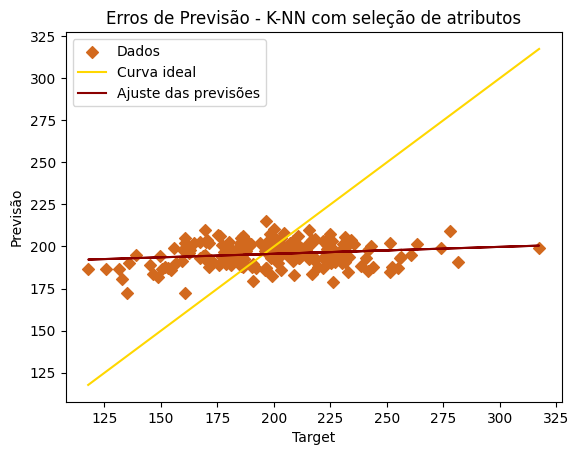

In [13]:
plt.scatter (target_teste, previsoes_knn, marker = "D", color = "chocolate", label = "Dados")

plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

b0_l, b1_l = regressao_linear_simples(target_teste,previsoes_knn)  
xfit = np.array(target_teste)
yfit_l = b0_l + b1_l*xfit
plt.plot(xfit, yfit_l, color = "darkred", label = "Ajuste das previsões")

plt.title("Erros de Previsão - K-NN com seleção de atributos")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Em seguida, fizemos o mesmo para um modelo que utiliza todos os atributos.

In [14]:
modelo_knn_geral=KNeighborsRegressor(**melhores_knn)
modelo_knn_geral.fit(atr_treino,target_treino)
previsoes_knn_g=modelo_knn_geral.predict(atr_teste)
RMSE_knn1=calcula_RMSE(target_teste, previsoes_knn_g)
print(RMSE_knn1)

31.033267938155316


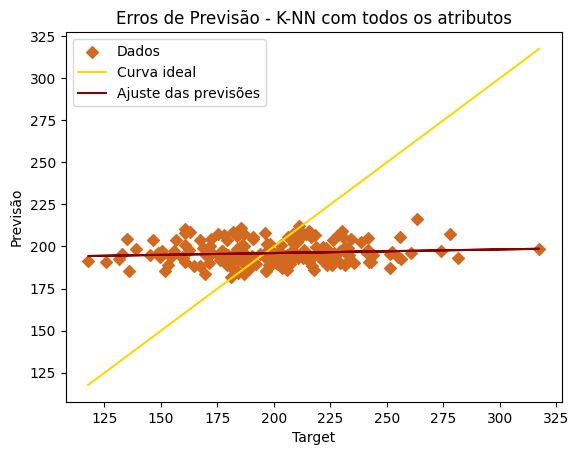

In [15]:
plt.scatter (target_teste, previsoes_knn_g, marker = "D", color = "chocolate", label = "Dados")

plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

b0_l, b1_l = regressao_linear_simples(target_teste,previsoes_knn_g)  
xfit = np.array(target_teste)
yfit_l = b0_l + b1_l*xfit
plt.plot(xfit, yfit_l, color = "darkred", label = "Ajuste das previsões")

plt.title("Erros de Previsão - K-NN com todos os atributos")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

## <font color=chocolate> Modelo Árvore de decisão

Primeiramente, para treinamento do modelo árvore de decisão, criamos uma função para instanciar o modelo, retornando diferentes combinações dos hiperparâmetros de número mínimo de divisões, número mínimo de folhas e número máximo de atributos utilizados para o modelo árvore de decisão.

In [16]:
def cria_instancia_modelo_tree(trial):
    """Recebe um trial para sortear diferentes combinações de hiperparâmetros para o modelo árvore de decisão."""

    parametros = {
        "min_samples_split": trial.suggest_int(
            "min_samples_split", 2, 20, log=True
        ),
        "min_samples_leaf": trial.suggest_int(
            "min_samples_leaf", 1, 20, log=True
        ),
        "max_features": trial.suggest_float("max_features", 0, 1),
    }

    model_tree = DecisionTreeRegressor(**parametros)

    return model_tree

Definiremos também um objeto de estudo para armazenar os testes feito pelo do módulo `optuna`.

In [17]:
NOME_DO_ESTUDO = "arvore_decisao_selecao1"
objeto_de_estudo_avr = create_study(
    direction="minimize",
    study_name=NOME_DO_ESTUDO,
    storage=f"sqlite:///{NOME_DO_ESTUDO}.db",
    load_if_exists=True,)

[I 2024-10-28 22:06:01,629] A new study created in RDB with name: arvore_decisao_selecao1


Por fim, antes de treinar o modelo, definiremos a função objetivo para o modelo árvore de decisão, que recebe apenas o número de tentativas para retornar o modelo treinado.

In [18]:
NUM_FOLDS = 10
def funcao_objetivo_parcial_avr(trial):
    return funcao_objetivo(trial,atr_treino_sel ,target_treino, NUM_FOLDS,cria_instancia_modelo_tree)

Assim, utilizaremos a função `optimize` do `optuna` para otimizar os hiperparâmetros do modelo de regressão árvore de decisão para 100 tentativas. 

In [19]:
NUM_TENTATIVAS = 100
objeto_de_estudo_avr.optimize(funcao_objetivo_parcial_avr, n_trials=NUM_TENTATIVAS)

[I 2024-10-28 22:06:02,123] Trial 0 finished with value: 42.19189980366654 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.417988229620473}. Best is trial 0 with value: 42.19189980366654.
[I 2024-10-28 22:06:02,595] Trial 1 finished with value: 35.61169966712536 and parameters: {'min_samples_split': 3, 'min_samples_leaf': 11, 'max_features': 0.7859504503030146}. Best is trial 1 with value: 35.61169966712536.
[I 2024-10-28 22:06:03,069] Trial 2 finished with value: 42.27241853868732 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 0.5628966800941059}. Best is trial 1 with value: 35.61169966712536.
[I 2024-10-28 22:06:03,498] Trial 3 finished with value: 34.99821934425139 and parameters: {'min_samples_split': 2, 'min_samples_leaf': 19, 'max_features': 0.8025173783457064}. Best is trial 3 with value: 34.99821934425139.
[I 2024-10-28 22:06:03,975] Trial 4 finished with value: 43.05257231953077 and parameters: {'min_samples_sp

[I 2024-10-28 22:06:16,639] Trial 37 finished with value: 34.403389725660055 and parameters: {'min_samples_split': 13, 'min_samples_leaf': 20, 'max_features': 0.3054865209852531}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:17,018] Trial 38 finished with value: 35.55747939465287 and parameters: {'min_samples_split': 11, 'min_samples_leaf': 10, 'max_features': 0.23167869713142678}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:17,379] Trial 39 finished with value: 35.265088876429026 and parameters: {'min_samples_split': 17, 'min_samples_leaf': 17, 'max_features': 0.38225290889604463}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:17,729] Trial 40 finished with value: 35.386710929771255 and parameters: {'min_samples_split': 14, 'min_samples_leaf': 12, 'max_features': 0.17377410939495935}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:18,096] Trial 41 finished with value: 34.37659489140775 and parame

[I 2024-10-28 22:06:29,989] Trial 73 finished with value: 34.39387526660397 and parameters: {'min_samples_split': 12, 'min_samples_leaf': 20, 'max_features': 0.17785861949773987}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:30,337] Trial 74 finished with value: 34.11993953629607 and parameters: {'min_samples_split': 11, 'min_samples_leaf': 17, 'max_features': 0.06925217309540925}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:30,702] Trial 75 finished with value: 35.178569120635736 and parameters: {'min_samples_split': 11, 'min_samples_leaf': 13, 'max_features': 0.06806312264930464}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:31,099] Trial 76 finished with value: 34.69083480055858 and parameters: {'min_samples_split': 16, 'min_samples_leaf': 17, 'max_features': 0.015065698224198246}. Best is trial 27 with value: 33.65061575026169.
[I 2024-10-28 22:06:31,494] Trial 77 finished with value: 34.38017954451043 and parame

Feito isso, recuperaremos o trial com melhor desempenho e seus hiperparâmetros, treinando um modelo de árvore de decisão com tais hiperparâmetros e calculando seu RMSE.

In [20]:
melhor_trial_avr = objeto_de_estudo_avr.best_trial
melhores_avr=melhor_trial_avr.params
print(f"Número do melhor trial: {melhor_trial_avr.number}")
print(f"Parâmetros do melhor trial: {melhores_avr}")

Número do melhor trial: 27
Parâmetros do melhor trial: {'min_samples_split': 19, 'min_samples_leaf': 20, 'max_features': 0.09641221819164283}


Primeiramente, treinamos o modelo com seleção de atributos e plotamos um gráfico que relaciona o target com as previsões realizadas.

In [21]:
modelo_avr=DecisionTreeRegressor(**melhores_avr)
modelo_avr.fit(X_treino_modificado,target_treino)
previsoes_avr=modelo_avr.predict(X_teste_modificado)
RMSE_avr=calcula_RMSE(target_teste, previsoes_avr)
print(RMSE_avr)

30.788579258212902


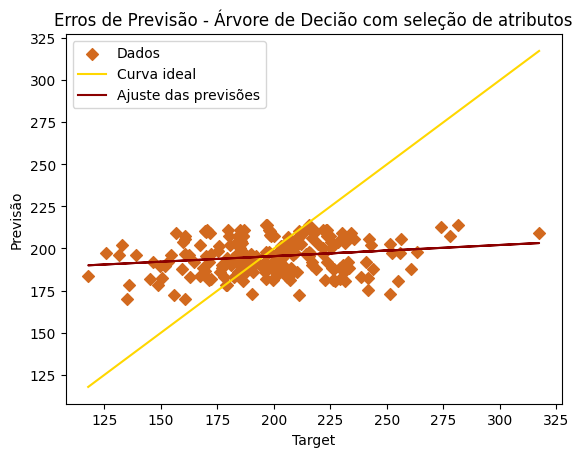

In [22]:
plt.scatter (target_teste, previsoes_avr, marker = "D", color = "chocolate", label = "Dados")

plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

b0_l, b1_l = regressao_linear_simples(target_teste,previsoes_avr)  
xfit = np.array(target_teste)
yfit_l = b0_l + b1_l*xfit
plt.plot(xfit, yfit_l, color = "darkred", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Árvore de Decião com seleção de atributos")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

Em seguida, fizemos o mesmo para um modelo que utiliza todos os atributos.

In [23]:
modelo_avr_geral=DecisionTreeRegressor(**melhores_avr)
modelo_avr_geral.fit(atr_treino,target_treino)
previsoes_avr_g=modelo_avr_geral.predict(atr_teste)
RMSE_avr1=calcula_RMSE(target_teste, previsoes_avr_g)
print(RMSE_avr1)

32.39092713520679


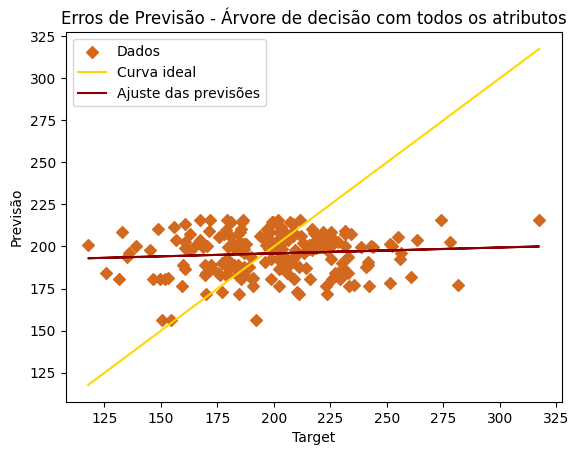

In [24]:
plt.scatter (target_teste, previsoes_avr_g, marker = "D", color = "chocolate", label = "Dados")

plt.plot([min(target_teste),max(target_teste)],[min(target_teste),max(target_teste)], color = "gold", label = "Curva ideal")

b0_l, b1_l = regressao_linear_simples(target_teste,previsoes_avr_g)  
xfit = np.array(target_teste)
yfit_l = b0_l + b1_l*xfit
plt.plot(xfit, yfit_l, color = "darkred", label = "Ajuste das previsões")

plt.title("Erros de Previsão - Árvore de decisão com todos os atributos")
plt.legend()
plt.xlabel("Target")
plt.ylabel("Previsão")
plt.show()

## <font color=chocolate> Discussões e Conclusão
    
Para análise dos resultados obtidos, podemos plotar um gráfico de barras que compara os RMSE's obtidos.

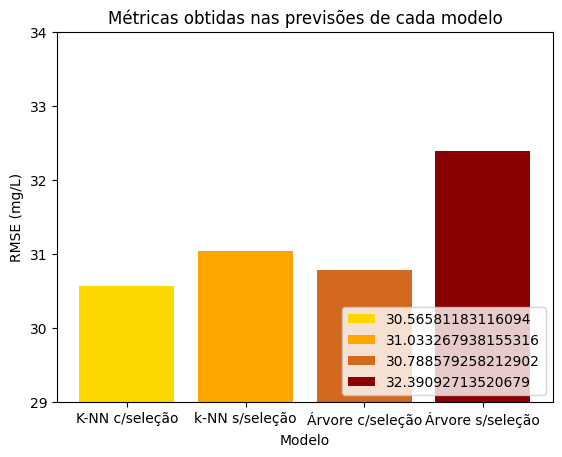

In [25]:
plt.bar("K-NN c/seleção", RMSE_knn, color = "gold", label = RMSE_knn)
plt.bar("k-NN s/seleção", RMSE_knn1, color = "orange", label = RMSE_knn1)
plt.bar("Árvore c/seleção", RMSE_avr, color="chocolate", label=RMSE_avr)
plt.bar("Árvore s/seleção", RMSE_avr1, color="darkred", label= RMSE_avr1)
plt.ylim(29,34)
plt.title("Métricas obtidas nas previsões de cada modelo")
plt.legend(loc='lower right')
plt.xlabel("Modelo")
plt.ylabel("RMSE (mg/L)")
plt.show()

Como esperado para cada modelo, os modelos treinados com atributos selecionados apresentaram um melhor desempenho, visto que foram escolhidos os atributos que se relacionam melhor com o target que se queria prever. Entretando, a diferença de desempenho entre os modelos foi inesperada, com o k-nn se mostrando um melhor modelo para o dataset em questão, rejeitando a hipótese inicial. Apesar de métricas de RMSE muito próximas, a hipótese pode ser rejeitada pois a eficiência de um modelo não é definidas só pela seleção de atributos e otimização de hiperparâmetros, mas também a correlação dos dados do dataset, a confiabilidade e a dimensionalidade dos dados estudados.

Desse modo, podemos concluir que a hipótese inicial é falsa, visto que a eficiência do modelo depende de diferentes fatores no treinamento do modelo e nos próprios dados analisados.

## <font color=chocolate> Referências

Water Quality. Disponível em: <https://www.kaggle.com/datasets/adityakadiwal/water-potability>. Acesso em: 7 de Set. 2024.

Optuna: A Next-generation Hyperparameter Optimization Framework. Akiba, Takuya, Shu Sano, Toshihiko Yanase, Takeru Ohta, e Masanori Koyama. In Proceedings of the 25th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining, 2623–2631, 2019. doi:10.1145/3292500.3330701.Disponível em: https://optuna.readthedocs.io/en/stable/. Acesso em 28 Out. 2024.

CASSAR, DR. ATP-203 4.1 - Árvore de decisão. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 ATP-203 6.1 - Otimização de hiperparâmetros com optuna. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.

CASSAR, DR. ATP-203 7.1 - Seleção de atributos. Microsoft Teams, T03-ATP-203 - Aprendizado de Máquina, Material de Aula.